<a href="https://colab.research.google.com/github/prog815/abscur_prediction/blob/master/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B2%D0%B0%D0%BB%D1%8E%D1%82_%D0%BF%D0%BE_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%BD%D0%BE%D1%81%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D1%85_%D0%B8%D0%B7%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9_%D0%B0%D0%B1%D1%81%D0%BE%D0%BB%D1%8E%D1%82%D0%BD%D1%8B%D1%85_%D0%B2%D0%B0%D0%BB%D1%8E%D1%82%D0%BD%D1%8B%D1%85_%D0%BA%D1%83%D1%80%D1%81%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Кластеризация валют по корреляции относительных изменений абсолютных валютных курсов**

**Абсолютный курс**

Енин А.В.

г. Оренбург

2020 г.

Сайт - http://www.abscur.ru

Twitter - https://twitter.com/abscurs

ВКонтакте -  https://vk.com/abscur

Одноклассники -  https://ok.ru/group/53547043520717

FB -  https://www.facebook.com/abscur 

Telegram - https://t.me/AbsCur

GitHub - https://github.com/prog815/abscur_prediction

WhatsUp - https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs

Viber - https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc

Анализируем корреляцию относительных изменений абсолютных валютных курсов. Смотрим как они связаны в облаке после кластеризации.

# Библиотеки

In [0]:
import datetime
print(datetime.date.today())

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

2020-03-25


# Импорт данных

Таблица с историей абсолютных курсов: https://docs.google.com/spreadsheets/d/1_-cdNCIC6NgyRDj0zLJBaohXo-K8qCfxfDLbYq2JLhs/edit#gid=422799220

In [0]:
data_url = 'https://docs.google.com/spreadsheets/d/1_-cdNCIC6NgyRDj0zLJBaohXo-K8qCfxfDLbYq2JLhs/export?format=csv&id=1_-cdNCIC6NgyRDj0zLJBaohXo-K8qCfxfDLbYq2JLhs&gid=422799220'
abs_data = pd.read_csv(data_url,decimal=',',parse_dates=True,index_col=0)
abs_data.shape

(1299, 45)

## Подготовка данных

In [0]:
dates = abs_data.index.values # даты
cur_names = abs_data.columns.values # имена валют
data = abs_data.values # матрица абсолютных курсов
d_data = np.zeros_like(data) # матрица относительных изменений
d_data[1:,:] = (data[1:,:]-data[:-1,:])/data[:-1,:] # расчет матрицы относительных изменений

# Считаем корреляции

In [0]:
d_corr = np.corrcoef(d_data.T)
d_corr[np.eye(d_corr.shape[0])==1] = 0 # убираем единичные элементы с гллавной диагонали
d_corr

array([[ 0.        ,  0.29390457, -0.36120454, ...,  0.00851968,
        -0.16996001, -0.37598103],
       [ 0.29390457,  0.        , -0.03860694, ...,  0.00823184,
        -0.06553413, -0.03666872],
       [-0.36120454, -0.03860694,  0.        , ...,  0.33829805,
         0.37140179,  0.91506062],
       ...,
       [ 0.00851968,  0.00823184,  0.33829805, ...,  0.        ,
         0.07694643,  0.29504194],
       [-0.16996001, -0.06553413,  0.37140179, ...,  0.07694643,
         0.        ,  0.34412408],
       [-0.37598103, -0.03666872,  0.91506062, ...,  0.29504194,
         0.34412408,  0.        ]])

# Ищем кластеры

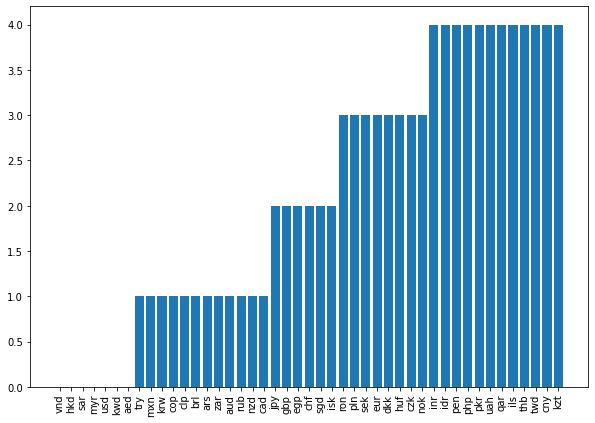

In [0]:
model = KMeans(n_clusters=5)

model.fit(d_corr)

clasters = model.predict(d_corr)

cl_df = pd.DataFrame(clasters,index=cur_names)
cl_df = cl_df.sort_values(0)

x = cl_df.index
h = cl_df.values.reshape((-1,))

plt.figure(figsize=(10,7))
plt.bar(x,h)
plt.xticks(rotation=90)
plt.show()

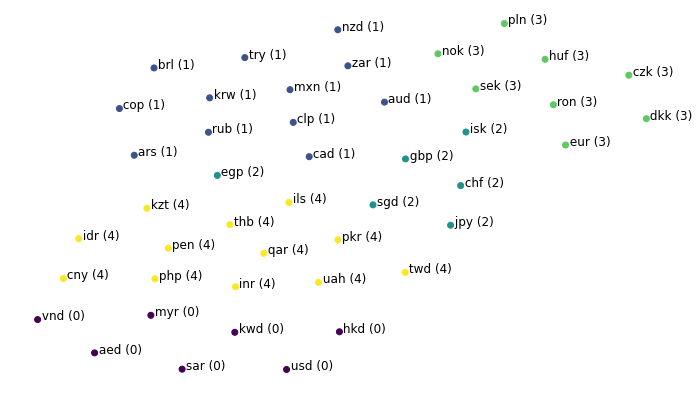

In [0]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate=500)

transformed = model.fit_transform(d_corr)

# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.figure(figsize=(12,7))

plt.scatter(x_axis, y_axis,c=clasters)

for i in range(len(cur_names)):
    plt.text(x_axis[i],y_axis[i], " {} ({})".format(cur_names[i],clasters[i]),fontsize=12)

plt.axis('off')

plt.show()

Все валюты разделили на пять групп. На облаке видно как с противоположных сторон расположились группы доллара и евро.